In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil
# Going to use these 5 base models for the stacking
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
'''
CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'malicious-urls-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1486586%2F2456026%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240608%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240608T044022Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5d7598b150658e7dd4ce308c927413193dca88a01009ae19491817639ec3a9cfd06ba1ffc4f6bad2e60cb67eb5c47c65dec2291ac0bfc3be17927f8b36f9caf49ab5f1b60f7405cc07e3ca8ed0011ad68d27b086e95238be835114d4b90c4937a252b6428d300821984645de9a3d99c2f45a533661f27e8b3415994fae695a70728a2c2981a15524d536b592db133972cf66247ee29b4bf32b744a338e13ec16482e6d4248cda708e728411dc9a4ccdbea46a73336f172c189371e7edf10fe71956cacefd0280977fd5f915715b615a7b4a32664b44bf55ad471831e41de6d238d92dba97d6427b5b0bcfc1638e54186bc4205ab292756a790829579328311a4'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')
'''

'\nCHUNK_SIZE = 40960\nDATA_SOURCE_MAPPING = \'malicious-urls-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1486586%2F2456026%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240608%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240608T044022Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5d7598b150658e7dd4ce308c927413193dca88a01009ae19491817639ec3a9cfd06ba1ffc4f6bad2e60cb67eb5c47c65dec2291ac0bfc3be17927f8b36f9caf49ab5f1b60f7405cc07e3ca8ed0011ad68d27b086e95238be835114d4b90c4937a252b6428d300821984645de9a3d99c2f45a533661f27e8b3415994fae695a70728a2c2981a15524d536b592db133972cf66247ee29b4bf32b744a338e13ec16482e6d4248cda708e728411dc9a4ccdbea46a73336f172c189371e7edf10fe71956cacefd0280977fd5f915715b615a7b4a32664b44bf55ad471831e41de6d238d92dba97d6427b5b0bcfc1638e54186bc4205ab292756a790829579328311a4\'\n\nKAGGLE_INPUT_PATH=\'/kaggle/input\

In [2]:
!pip install python-whois

In [3]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import itertools
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import math
from collections import Counter
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import xgboost as xgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
import os
import socket
import whois
from datetime import datetime
import time
from bs4 import BeautifulSoup
import urllib
import bs4
import os
import seaborn as sns
import sys
import tarfile
import shutil
'''
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''

"\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [5]:
'''
from google.colab import drive
 drive.mount('/content/drive')

 import os
 print(os.listdir('/content/drive/MyDrive/Colab Notebooks/malicious URL dataset'))

# import os
# print(os.listdir('/kaggle/input/'))

# Define the file path
 file_path = '/content/drive/MyDrive/Colab Notebooks/malicious URL dataset/malicious_phish.csv'
'''

import os
print(os.listdir('C:/Users/wku/Desktop/project/dataset/'))

# Define the file path
file_path = 'C:/Users/wku/Desktop/project/dataset/malicious_phish.csv'

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(file_path)

print(df.shape)
df.head()

['malicious_phish.csv']
(651191, 2)


,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [6]:
# Count the number of values for each 'type'
type_counts = df.type.value_counts()
df.type.value_counts()

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

# Feature Engineering

In [7]:
import re
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))
# df['use_of_ip'] = df['use_of_ip'].astype(str)

In [8]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["type_code"] = lb_make.fit_transform(df["type"])
df["type_code"].value_counts()

type_code
0    428103
1     96457
3     94111
2     32520
Name: count, dtype: int64

In [9]:
# 将 "benign" 标记为 "good", 其他三种标记为 "bad"
df['url_property'] = df['type'].apply(lambda x: '0' if x == 'benign' else '1')

# 查看新特征的分布
print(df['url_property'].value_counts())

# 把 url_property 列转换为 int 属性
df['url_property'] = df['url_property'].astype(int)

url_property
0    428103
1    223088
Name: count, dtype: int64


In [10]:
from urllib.parse import urlparse




def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0


df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

In [11]:
!pip install googlesearch-python

In [12]:
df['count.'] = df['url'].apply(lambda i: i.count('.'))
df.head()

,url,type,use_of_ip,type_code,url_property,abnormal_url,count.
0,br-icloud.com.br,phishing,0,3,1,0,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,0,0,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,0,0,2
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,1,3
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,1,2


In [13]:
df['count-www'] = df['url'].apply(lambda i: i.count('www'))
df['count@'] = df['url'].apply(lambda i: i.count('@'))
from urllib.parse import urlparse
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))
def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')
df['count_embed_domian'] = df['url'].apply(lambda i: no_of_embed(i))
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
df['short_url'] = df['url'].apply(lambda i: shortening_service(i))
# df['short_url'] = df['short_url'].astype(str)

In [14]:
df['count-https'] = df['url'].apply(lambda i : i.count('https'))
# df['count-https'] = df['count-https'].astype(str)
df['count-http'] = df['url'].apply(lambda i : i.count('http'))

In [15]:
df['count%'] = df['url'].apply(lambda i: i.count('%'))
df['count?'] = df['url'].apply(lambda i: i.count('?'))
df['count-'] = df['url'].apply(lambda i: i.count('-'))
df['count='] = df['url'].apply(lambda i: i.count('='))
#Length of URL
df['url_length'] = df['url'].apply(lambda i: len(str(i)))
#Hostname Length
df['hostname_length'] = df['url'].apply(lambda i: len(urlparse(i).netloc))

df.head()

,url,type,use_of_ip,type_code,url_property,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,count%,count?,count-,count=,url_length,hostname_length
0,br-icloud.com.br,phishing,0,3,1,0,2,0,0,0,0,0,0,0,0,0,1,0,16,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,35,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,0,0,2,0,0,3,0,0,0,0,0,0,0,0,31,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,1,3,1,0,1,0,0,0,1,0,1,1,4,88,21
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,1,2,0,0,1,0,0,0,1,0,1,1,3,235,23


In [16]:
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))

In [17]:
df.head()

,url,type,use_of_ip,type_code,url_property,abnormal_url,count.,count-www,count@,count_dir,...,short_url,count-https,count-http,count%,count?,count-,count=,url_length,hostname_length,sus_url
0,br-icloud.com.br,phishing,0,3,1,0,2,0,0,0,...,0,0,0,0,0,1,0,16,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,0,0,2,0,0,2,...,0,0,0,0,0,0,0,35,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,0,0,2,0,0,3,...,0,0,0,0,0,0,0,31,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,1,3,1,0,1,...,0,0,1,0,1,1,4,88,21,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,1,2,0,0,1,...,0,0,1,0,1,1,3,235,23,0


In [18]:

!pip install tld

In [19]:
#Importing dependencies
from urllib.parse import urlparse
from tld import get_tld
import os.path

#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

#Length of Top Level Domain
df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))

In [20]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
df['count-digits']= df['url'].apply(lambda i: digit_count(i))

In [21]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
df['count-letters']= df['url'].apply(lambda i: letter_count(i))

In [22]:
df = df.drop(columns="tld")

In [23]:
'''
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["type_code"] = lb_make.fit_transform(df["type"])
df["type_code"].value_counts()
'''

'\nfrom sklearn.preprocessing import LabelEncoder\n\nlb_make = LabelEncoder()\ndf["type_code"] = lb_make.fit_transform(df["type"])\ndf["type_code"].value_counts()\n'

In [24]:
# 打印数据框的基本信息
df.dtypes

url                   object
type                  object
use_of_ip              int64
type_code              int32
url_property           int32
abnormal_url           int64
count.                 int64
count-www              int64
count@                 int64
count_dir              int64
count_embed_domian     int64
short_url              int64
count-https            int64
count-http             int64
count%                 int64
count?                 int64
count-                 int64
count=                 int64
url_length             int64
hostname_length        int64
sus_url                int64
fd_length              int64
tld_length             int64
count-digits           int64
count-letters          int64
dtype: object

# Data Split

In [25]:
import pandas as pd
import numpy as np

# Filter the dataset to include only the 'benign', 'phishing', and 'malware' classes
train_df = df[df['type'].isin(['benign', 'defacement', 'malware'])]

# Get the 'benign' URLs
benign_urls = train_df[train_df['type'] == 'benign']['url']

# Randomly sample 96457 'benign' URLs
test_benign_urls = benign_urls.sample(n=94111, random_state=42)

# Create the test set
test_df = df[df['url'].isin(test_benign_urls) | (df['type'] == 'phishing')]

# Create the training set
train_df = train_df[~train_df['url'].isin(test_benign_urls)]

In [26]:
#Predictor Variables
X_train = train_df[['use_of_ip','abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domian', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
       'count-letters']]

X_test = test_df[['use_of_ip','abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domian', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
       'count-letters']]

#Target Variable
#y_train = train_df['url_property']

y_train_smote = train_df['type_code']

y_test = test_df['url_property']

In [27]:
print(X_train.shape)

(462962, 21)


In [28]:
print(X_test.shape)

(188229, 21)


In [29]:
print(y_train_smote.shape)

(462962,)


In [30]:
print(y_test.shape)

(188229,)


In [31]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
sm = SMOTE(random_state=42)

# Fit SMOTE to training data
X_train_res, y_train_res_smote = sm.fit_resample(X_train, y_train_smote)

y_train_s = pd.Series(y_train_smote)
y_train_res_smote = pd.Series (y_train_res_smote)

# Print class distribution of original and resampled data
print('Class distribution before resampling:', y_train_s.value_counts())
print('Class distribution after resampling:', y_train_res_smote.value_counts())

Class distribution before resampling: type_code
0    333985
1     96457
2     32520
Name: count, dtype: int64
Class distribution after resampling: type_code
0    333985
1    333985
2    333985
Name: count, dtype: int64


In [32]:
# Create a copy of y_train_res
y_train_res = y_train_res_smote.copy()

# Set type_code 1 and 2 to 1
y_train_res[y_train_res != 0] = 1

# Print the new class distribution
print('Class distribution after resampling and merging classes:', y_train_res.value_counts())

Class distribution after resampling and merging classes: type_code
1    667970
0    333985
Name: count, dtype: int64


# Before Hyperparameters tuning

## LGBMClassifier

In [33]:
# lgb = LGBMClassifier(objective='multiclass',boosting_type= 'gbdt',n_jobs = 5,
#          silent = True, random_state=5)
import time

# Initialize and start the timer for model training
start_time_lgb = time.time()
lgb = LGBMClassifier( )
LGB_C = lgb.fit(X_train_res, y_train_res)

# Calculate the model training time
training_time_lgbm = time.time() - start_time_lgb

y_pred_train = LGB_C.predict(X_train_res)
# Initialize and start the timer for model execution
start_time = time.time()
y_pred = LGB_C.predict(X_test)
# Calculate the model execution time
execution_time_lgbm = ( time.time() - start_time ) / 188229

print(classification_report(y_test,y_pred))

score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

[LightGBM] [Info] Number of positive: 667970, number of negative: 333985
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023825 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1085
[LightGBM] [Info] Number of data points in the train set: 1001955, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.666667 -> initscore=0.693147
[LightGBM] [Info] Start training from score 0.693147
              precision    recall  f1-score   support

           0       0.65      1.00      0.79     94118
           1       0.99      0.46      0.63     94111

    accuracy                           0.73    188229
   macro avg       0.82      0.73      0.71    188229
weighted avg       0.82      0.73      0.71    188229

accuracy:   0.731


In [34]:
lgb_train=LGB_C.predict(X_train_res)
lgb_test=LGB_C.predict(X_test)

In [35]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


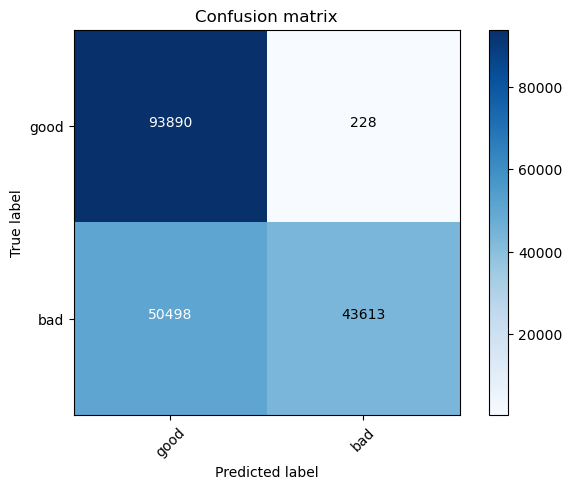

In [36]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=[0,1])
plot_confusion_matrix(cm,classes=['good', 'bad'])

In [37]:
lgb_feature = lgb.feature_importances_
lgb_feature

array([  1,   2, 260, 107,   0, 349,  12,  28,  29,  15,  91,  57, 160,
       128, 274, 408,  69, 425, 182, 260, 143])

In [38]:
lgb_features = lgb_feature.tolist()

# Hyper Parameters tuning

In [39]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [40]:
'''
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def objective(trial):
    # Number of trees in random forest
    
    n_estimators = trial.suggest_int(name="n_estimators", low=100, high=500, step=100)

    # Number of features to consider at every split
    max_features = trial.suggest_categorical(name="max_features", choices=['auto', 'sqrt'])

    # Maximum number of levels in tree
    max_depth = trial.suggest_int(name="max_depth", low=10, high=110, step=20)

    # Minimum number of samples required to split a node
    min_samples_split = trial.suggest_int(name="min_samples_split", low=2, high=10, step=2)

    # Minimum number of samples required at each leaf node
    min_samples_leaf = trial.suggest_int(name="min_samples_leaf", low=1, high=4, step=1)

    
    # Random state
    random_state = trial.suggest_int(name="random_state", low=0, high=100, step=1)
    
    params = {
        "n_estimators": n_estimators,
        "max_features": max_features,
        "max_depth": max_depth,
        "min_samples_split": min_samples_split,
        "min_samples_leaf": min_samples_leaf,
        "random_state": random_state
    }
    

    params = {
        "random_state": random_state
    }
    model = RandomForestClassifier(**params)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print('Best hyperparameters:', study.best_params)
print('Best Accuracy:', study.best_value)
'''

'\nimport optuna\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import accuracy_score\n\ndef objective(trial):\n    # Number of trees in random forest\n    \n    n_estimators = trial.suggest_int(name="n_estimators", low=100, high=500, step=100)\n\n    # Number of features to consider at every split\n    max_features = trial.suggest_categorical(name="max_features", choices=[\'auto\', \'sqrt\'])\n\n    # Maximum number of levels in tree\n    max_depth = trial.suggest_int(name="max_depth", low=10, high=110, step=20)\n\n    # Minimum number of samples required to split a node\n    min_samples_split = trial.suggest_int(name="min_samples_split", low=2, high=10, step=2)\n\n    # Minimum number of samples required at each leaf node\n    min_samples_leaf = trial.suggest_int(name="min_samples_leaf", low=1, high=4, step=1)\n\n    \n    # Random state\n    random_state = trial.suggest_int(name="random_state", low=0, high=100, step=1)\n    \n    params = {\n        "n_es

## SGD Classifier

In [41]:
# Initialize and start the timer for model training
start_time_sgd = time.time()

# Initialize and train the SGDClassifier
sgd_classifier = SGDClassifier( )
sgd_classifier.fit(X_train_res, y_train_res)

# Calculate the model training time
training_time_sgd = time.time() - start_time_sgd

# Initialize and start the timer for model execution
start_time = time.time()

# Predict the labels for the testing set
y_pred_sgd = sgd_classifier.predict(X_test)

# Calculate the model execution time
execution_time_sgd = ( time.time() - start_time ) / 188229

print(classification_report(y_test, y_pred_sgd))

score = metrics.accuracy_score(y_test, y_pred_sgd)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

           0       0.56      0.98      0.71     94118
           1       0.90      0.22      0.35     94111

    accuracy                           0.60    188229
   macro avg       0.73      0.60      0.53    188229
weighted avg       0.73      0.60      0.53    188229

accuracy:   0.598


## Extra_trees_classifier

In [42]:
# Initialize and start the timer for model training
start_time_et = time.time()

# Initialize and train the ExtraTreesClassifier
extra_trees_classifier = ExtraTreesClassifier( )
extra_trees_classifier.fit(X_train_res, y_train_res)

# Calculate the model training time
training_time_et = time.time() - start_time_et

# Initialize and start the timer for model execution
start_time = time.time()

# Predict the labels for the testing set
y_pred_extra_trees = extra_trees_classifier.predict(X_test)

# Calculate the model execution time
execution_time_et = ( time.time() - start_time ) / 192922

print(classification_report(y_test, y_pred_extra_trees))

score = metrics.accuracy_score(y_test, y_pred_extra_trees)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

           0       0.63      1.00      0.77     94118
           1       1.00      0.42      0.59     94111

    accuracy                           0.71    188229
   macro avg       0.81      0.71      0.68    188229
weighted avg       0.81      0.71      0.68    188229

accuracy:   0.709


Confusion matrix, without normalization


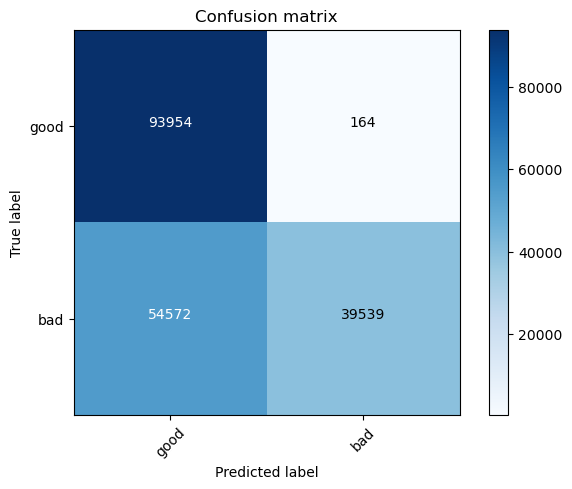

In [43]:
CM_Extra=confusion_matrix(y_test, y_pred_extra_trees ,labels=[0,1])

plot_confusion_matrix(CM_Extra, classes=['good', 'bad'])

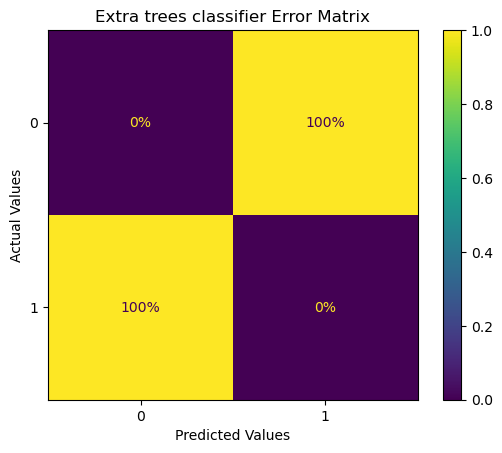

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay
sample_weight = (y_pred_extra_trees != y_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_extra_trees, sample_weight=sample_weight, normalize="true", values_format=".0%")
plt.title('Extra trees classifier Error Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
# Save the plot as a PDF
plt.savefig('Extra trees classifier Error Matrix.pdf', format='pdf')
plt.show()

In [45]:
et_feature = extra_trees_classifier.feature_importances_
et_features = et_feature.tolist()

## Random Forest Classifier

In [46]:
# Initialize and start the timer for model training
start_time_rf = time.time()

rf = RandomForestClassifier( )
rf.fit(X_train_res, y_train_res)

# Calculate the model training time
training_time_rf = time.time() - start_time_rf

y_pred_train_RF = rf.predict(X_train_res)

# Initialize and start the timer for model execution
start_time = time.time()

y_pred_RF = rf.predict(X_test)

# Calculate the model execution time
execution_time_rf = ( time.time() - start_time ) / 188229

print(classification_report(y_test,y_pred_RF))

score = metrics.accuracy_score(y_test, y_pred_RF)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

           0       0.64      1.00      0.78     94118
           1       1.00      0.44      0.61     94111

    accuracy                           0.72    188229
   macro avg       0.82      0.72      0.69    188229
weighted avg       0.82      0.72      0.69    188229

accuracy:   0.718


In [47]:
rf_train=rf.predict(X_train_res)
rf_test=rf.predict(X_test)

Confusion matrix, without normalization


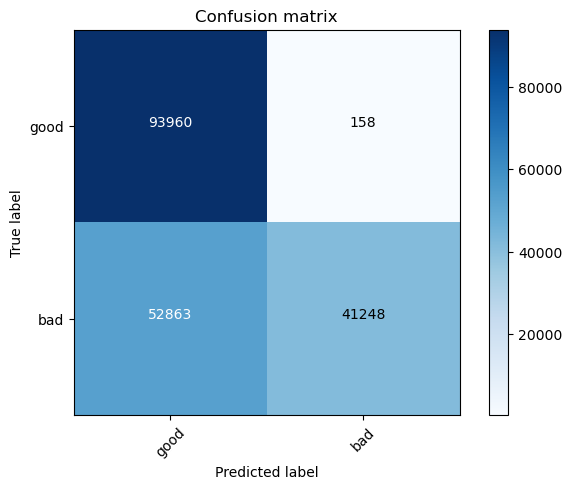

In [48]:
CM_RF=confusion_matrix(y_test,y_pred_RF,labels=[0,1])

plot_confusion_matrix(CM_RF,classes=['good', 'bad'])

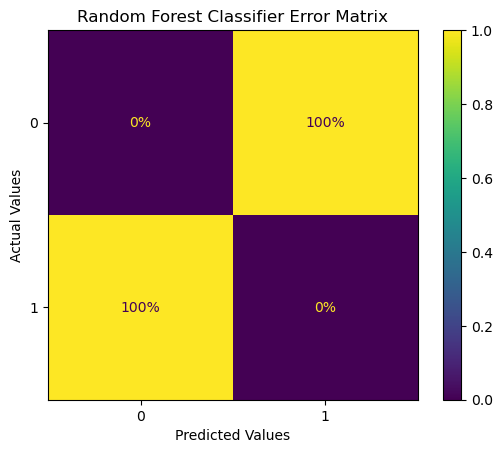

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay
sample_weight = (y_pred_RF != y_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_RF, sample_weight=sample_weight, normalize="true", values_format=".0%")
plt.title('Random Forest Classifier Error Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
# Save the plot as a PDF
plt.savefig('Random Forest Classifier Error Matrix.pdf', format='pdf')
plt.show()

In [50]:
rf_feature = rf.feature_importances_
rf_features = rf_feature.tolist()

## XGB Classifier

In [51]:
# Initialize and start the timer for model training
start_time_xgb = time.time()

model_xgb = xgb.XGBClassifier( )
model_xgb.fit(X_train_res,y_train_res)

# Calculate the model training time
training_time_xgb = time.time() - start_time_xgb

# Initialize and start the timer for model execution
start_time = time.time()

y_pred_xgb = model_xgb.predict(X_test)

# Calculate the model execution time
execution_time_xgb = ( time.time() - start_time ) / 188229

print(classification_report(y_test,y_pred_xgb))

score = metrics.accuracy_score(y_test, y_pred_xgb)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

           0       0.64      1.00      0.78     94118
           1       1.00      0.44      0.61     94111

    accuracy                           0.72    188229
   macro avg       0.82      0.72      0.70    188229
weighted avg       0.82      0.72      0.70    188229

accuracy:   0.720


In [52]:
model_xgb_train=model_xgb.predict(X_train_res)
model_xgb_test=model_xgb.predict(X_test)

Confusion matrix, without normalization


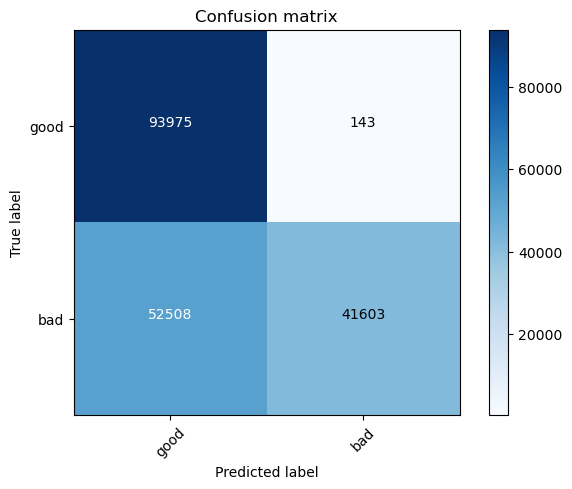

In [53]:
CM=confusion_matrix(y_test,y_pred_xgb,labels=[0,1])

plot_confusion_matrix(CM,classes=['good', 'bad'])

In [54]:
xgb_feature = model_xgb.feature_importances_
xgb_features = xgb_feature.tolist()

## Gradient Boosting Classifier

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
# gbdt = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')

# Initialize and start the timer for model training
start_time_gbc = time.time()

gbdt = GradientBoostingClassifier( )
gbdt.fit(X_train_res,y_train_res)

# Calculate the model training time
training_time_gbc = time.time() - start_time_gbc

# Initialize and start the timer for model execution
start_time = time.time()

y_pred_gdbt = gbdt.predict(X_test)

# Calculate the model execution time
execution_time_gbc = ( time.time() - start_time ) / 188229

print(classification_report(y_test,y_pred_gdbt))

score = metrics.accuracy_score(y_test, y_pred_gdbt)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

           0       0.64      0.98      0.78     94118
           1       0.96      0.46      0.62     94111

    accuracy                           0.72    188229
   macro avg       0.80      0.72      0.70    188229
weighted avg       0.80      0.72      0.70    188229

accuracy:   0.721


In [56]:
gbdt_train=gbdt.predict(X_train_res)
gbdt_test=gbdt.predict(X_test)

In [57]:
gbdt_feature = gbdt.feature_importances_
gbdt_features = gbdt_feature.tolist()

## Ada Boost Classifier

In [58]:
# Initialize and train the AdaBoostClassifier
# ada_classifier = AdaBoostClassifier(random_state=42)

# Initialize and start the timer for model training
start_time_ada = time.time()

ada_classifier = AdaBoostClassifier( )
ada_classifier.fit(X_train_res, y_train_res)

# Calculate the model training time
training_time_ada = time.time() - start_time_ada

# Initialize and start the timer for model execution
start_time = time.time()

# Predict the labels for the testing set
y_pred_ada = ada_classifier.predict(X_test)

# Calculate the model execution time
execution_time_ada = ( time.time() - start_time ) / 188229

print(classification_report(y_test,y_pred_ada))

score = metrics.accuracy_score(y_test, y_pred_ada)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

           0       0.65      0.97      0.78     94118
           1       0.94      0.48      0.64     94111

    accuracy                           0.73    188229
   macro avg       0.80      0.73      0.71    188229
weighted avg       0.80      0.73      0.71    188229

accuracy:   0.725


## stacking

In [59]:
base_predictions_train = pd.DataFrame( {
    'LGBM Classifier': lgb_train.ravel(),
        'Random Forest Classifier': rf_train.ravel(),
     'XGB Classifier': model_xgb_train.ravel(),
     'Gradient Boosting Classifier': gbdt_train.ravel(),
    })
base_predictions_train.head(5)

,LGBM Classifier,Random Forest Classifier,XGB Classifier,Gradient Boosting Classifier
0,0,0,0,0
1,0,0,0,0
2,1,1,1,1
3,1,1,1,1
4,0,0,0,0


In [60]:
lgb_train=lgb_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
model_xgb_train=model_xgb_train.reshape(-1, 1)
gbdt_train=gbdt_train.reshape(-1, 1)
lgb_test=lgb_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
model_xgb_test=model_xgb_test.reshape(-1, 1)
gbdt_test=gbdt_test.reshape(-1, 1)

In [61]:
x_train = np.concatenate(( lgb_train, rf_train, model_xgb_train, gbdt_train), axis=1)
x_test = np.concatenate(( lgb_test, rf_test, model_xgb_test, gbdt_test), axis=1)

In [62]:
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns

# Initialize and start the timer for model training
start_time_stk = time.time()

stk = xgb.XGBClassifier().fit(x_train, y_train_res)

# Calculate the model training time
training_time_stk = time.time() - start_time_stk

# Initialize and start the timer for model execution
start_time = time.time()

y_predict=stk.predict(x_test)

# Calculate the model execution time
execution_time_stk = ( time.time() - start_time ) / 188229

y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))

Accuracy of Stacking: 0.7183165187085944
Precision of Stacking: 0.8180625553830441
Recall of Stacking: 0.7183165187085944
F1-score of Stacking: 0.6943492688032686
              precision    recall  f1-score   support

           0       0.64      1.00      0.78     94118
           1       1.00      0.44      0.61     94111

    accuracy                           0.72    188229
   macro avg       0.82      0.72      0.69    188229
weighted avg       0.82      0.72      0.69    188229



Confusion matrix, without normalization


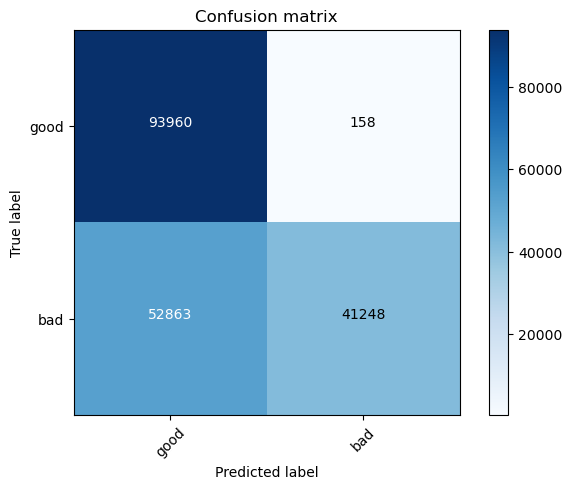

In [63]:
CM=confusion_matrix(y_test, y_predict, labels=[0,1])

plot_confusion_matrix(CM,classes=['good', 'bad'])

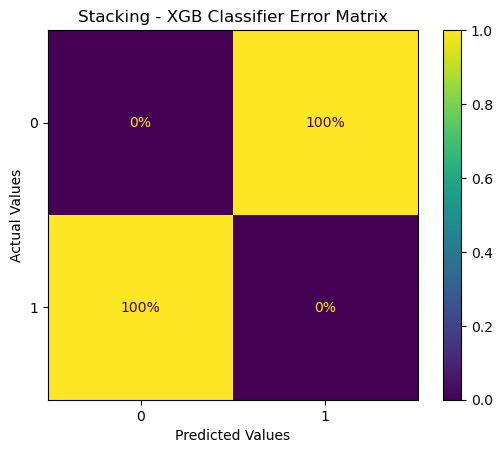

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay
sample_weight = (y_predict != y_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_predict, sample_weight=sample_weight, normalize="true", values_format=".0%")
plt.title('Stacking - XGB Classifier Error Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
# Save the plot as a PDF
plt.savefig('Stacking - XGB Classifier Error Matrix.pdf', format='pdf')
plt.show()

In [65]:
stk_feature = stk.feature_importances_
stk_features = gbdt_feature.tolist()

## Performance Metrics

In [66]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

# Assuming you have imported the classifiers and defined their predictions
classifiers = [y_pred_ada, y_pred_sgd, y_pred_extra_trees, y_pred, y_pred_RF, y_pred_xgb, y_pred_gdbt, y_predict]
model_names = ['Ada Boost', 'SGD', 'Extra Trees', 'LGBM', 'Random Forest', 'XGB', 'Gradient Boosting', 'Stacking']

# Create a dictionary to map model names to their respective predictions
classifier_map = dict(zip(model_names, classifiers))

# Now you can use this dictionary to iterate over each model name and its predictions
for model_name, y_pred in classifier_map.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1score = f1_score(y_test, y_pred, average='weighted')
    class_report = classification_report(y_test, y_pred)

    print(f"\nMetrics for Model '{model_name}':")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1score}")
    print(f"Classification Report:\n{class_report}")



Metrics for Model 'Ada Boost':
Accuracy: 0.7252601883875492
Precision: 0.796837594210933
Recall: 0.7252601883875492
F1-score: 0.7076318473692478
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.97      0.78     94118
           1       0.94      0.48      0.64     94111

    accuracy                           0.73    188229
   macro avg       0.80      0.73      0.71    188229
weighted avg       0.80      0.73      0.71    188229


Metrics for Model 'SGD':
Accuracy: 0.5982287532739377
Precision: 0.7286013081665644
Recall: 0.5982287532739377
F1-score: 0.5314092491106787
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.98      0.71     94118
           1       0.90      0.22      0.35     94111

    accuracy                           0.60    188229
   macro avg       0.73      0.60      0.53    188229
weighted avg       0.73      0.60      0.53    188229


Metrics for 

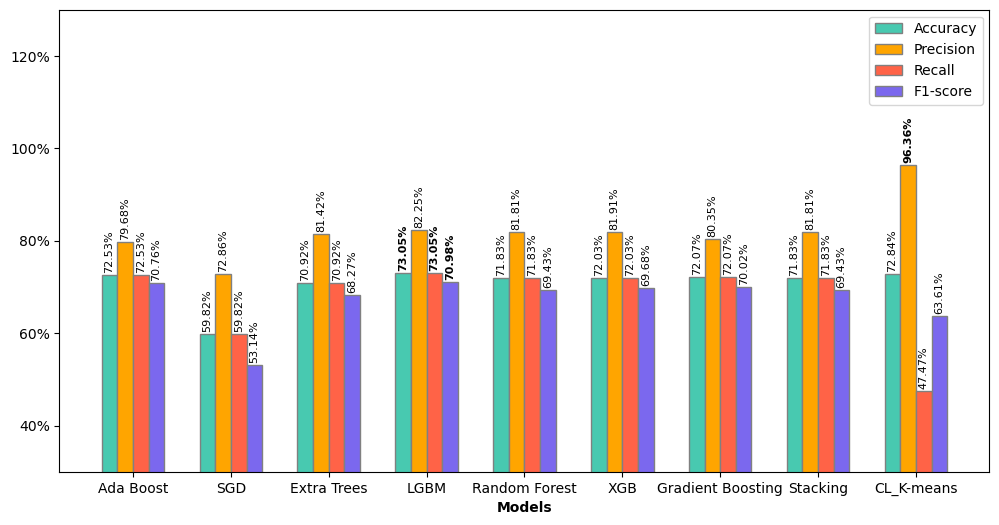

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Initialize data for the bar chart
models = list(classifier_map.keys()) + ['CL_K-means']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Calculate metric scores for each model
metric_scores = {}
for metric in metrics:
    metric_scores[metric] = [
        accuracy_score(y_test, classifier_map[model_name]) 
        if metric == 'Accuracy'
        else precision_score(y_test, classifier_map[model_name], average='weighted')
        if metric == 'Precision'
        else recall_score(y_test, classifier_map[model_name], average='weighted')
        if metric == 'Recall'
        else f1_score(y_test, classifier_map[model_name], average='weighted')
        for model_name in models[:-1]
    ]

    if metric == 'Accuracy':
        metric_scores[metric].append(0.7284)
    elif metric == 'Precision':
        metric_scores[metric].append(0.9636)
    elif metric == 'Recall':
        metric_scores[metric].append(0.4747)
    elif metric == 'F1-score':
        metric_scores[metric].append(0.6361)

# Set width of bars
bar_width = 0.16

# Set position of bars on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.figure(figsize=(12, 6))

# Define light colors
colors = ['#48C9B0', '#FFA500', '#FF6347', '#7B68EE']

# Plotting the bars
bars = []
bars.append(plt.bar(r1, metric_scores['Accuracy'], color=colors[0], width=bar_width, edgecolor='grey', label='Accuracy'))
bars.append(plt.bar(r2, metric_scores['Precision'], color=colors[1], width=bar_width, edgecolor='grey', label='Precision'))
bars.append(plt.bar(r3, metric_scores['Recall'], color=colors[2], width=bar_width, edgecolor='grey', label='Recall'))
bars.append(plt.bar(r4, metric_scores['F1-score'], color=colors[3], width=bar_width, edgecolor='grey', label='F1-score'))

# Adding labels on top of each bar with percentage format
for i, container in enumerate(bars):
   for j, bar in enumerate(container):
       yval = bar.get_height()
       if yval == max(metric_scores[metrics[i]]):
           plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.005, f'{yval*100:.2f}%', va='bottom', ha='center', rotation=90, fontsize=8, weight='bold')
       else:
           plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.005, f'{yval*100:.2f}%', va='bottom', ha='center', rotation=90, fontsize=8)

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width*1.5 for r in range(len(models))], models)

# Set y-axis as percentage and its limits
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))
plt.ylim(0.3, 1.3)  # Keep the original scale but now interpreted as percentages

# Add a legend and show the plot
plt.legend()
# Save the plot as a PDF
plt.savefig('Model Performance Comparison.pdf', format='pdf')
plt.show()

# Training Time Comparision

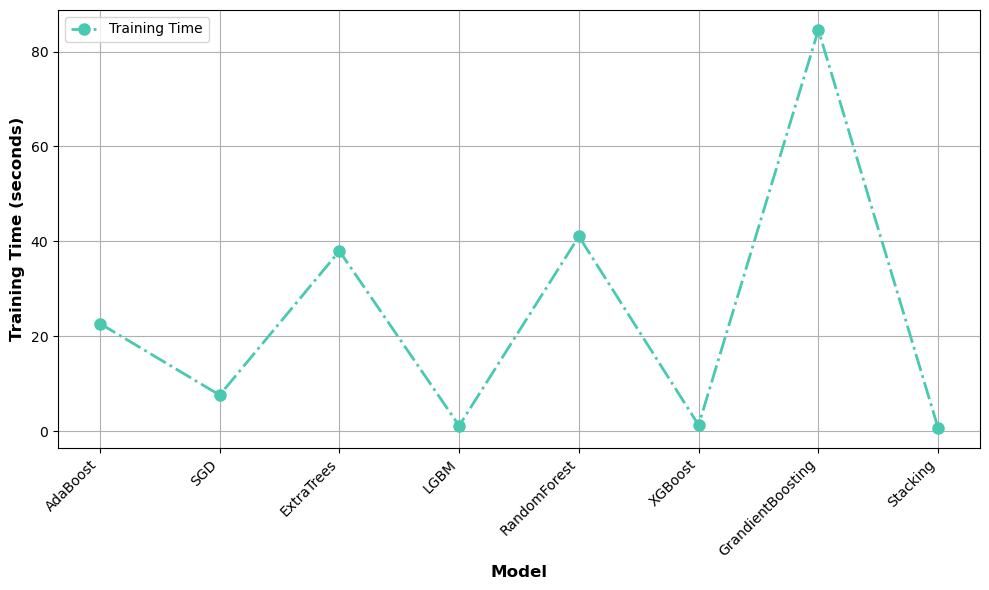

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have imported the classifiers and defined their training times
training_times = [training_time_ada, training_time_sgd, training_time_et, training_time_lgbm, training_time_rf, training_time_xgb, training_time_gbc, training_time_stk]

# Transpose the training_times list to make it a 2D array
training_times = np.array(training_times).T

# Initialize data for the line plot
training_models = ['AdaBoost', 'SGD', 'ExtraTrees', 'LGBM', 'RandomForest', 'XGBoost', 'GrandientBoosting', 'Stacking']  # Assuming these are your model names

# Set figure size
plt.figure(figsize=(10, 6))

# Define line colors and styles
colors = ['#48C9B0', '#FFA500', '#FF6347', '#7B68EE', '#8A2BE2']
linestyles = ['-', '--', ':', '-.', '-']

plt.plot(training_models, training_times, color=colors[0], linestyle=linestyles[i], linewidth=2, marker='o', markersize=8, label='Training Time')

# Add grid and axis labels
plt.grid(True)
plt.xlabel('Model', fontweight='bold', fontsize=12)
plt.ylabel('Training Time (seconds)', fontweight='bold', fontsize=12)

# Set x-axis tick labels
plt.xticks(training_models, training_models, rotation=45, ha='right', fontsize=10)

# Add a legend
plt.legend(loc='upper left', fontsize=10)

# Adjust the layout
plt.tight_layout()

# Save the plot as a PDF
plt.savefig('Model Training Time Comparison.pdf', format='pdf')
plt.show()

# Execution Time Comparision

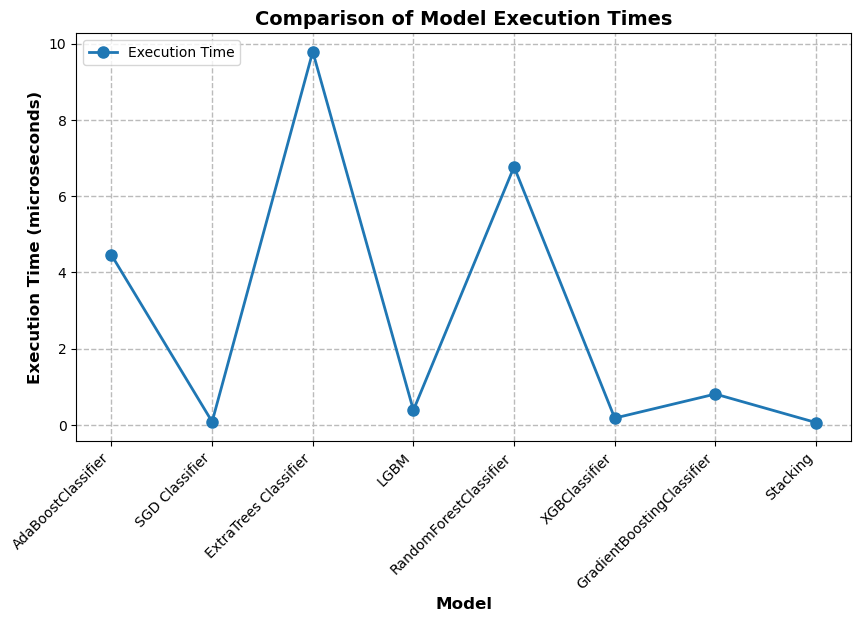

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

# Assuming you have imported the classifiers and defined their predicting times
execution_times = [execution_time_ada * 1_000_000,
                   execution_time_sgd * 1_000_000,
                   execution_time_et * 1_000_000,
                   execution_time_lgbm * 1_000_000,
                   execution_time_rf * 1_000_000,
                   execution_time_xgb * 1_000_000,
                   execution_time_gbc * 1_000_000,
                   execution_time_stk * 1_000_000]
model_names = ['AdaBoostClassifier', 'SGD Classifier', 'ExtraTrees Classifier', 'LGBM', 'RandomForestClassifier', 'XGBClassifier', 'GradientBoostingClassifier', 'Stacking']

execution_time = ['Execution Time']

# Create a dictionary to map model names to their execution_times (optional since we directly use execution_times and model_names)
# execution_times_map = dict(zip(model_names, execution_times))

# Initialize data for the line plot
x = np.arange(len(model_names))

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Define the line properties
line_width = 2
marker_size = 8
marker_style = 'o'

# Plot the line graph
ax.plot(x, execution_times, linewidth=line_width, marker=marker_style, markersize=marker_size, color='#1f77b4')

# Add axis labels and title
ax.set_xlabel('Model', fontweight='bold', fontsize=12)
ax.set_ylabel('Execution Time (microseconds)', fontweight='bold', fontsize=12)
ax.set_title('Comparison of Model Execution Times', fontweight='bold', fontsize=14)

# Customize the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right', fontsize=10)

# Add grid lines
ax.grid(True, linestyle='--', linewidth=1, color='#BBBBBB')

# Adjust the spacing between subplots
plt.subplots_adjust(bottom=0.2)

# Add a legend
legend_font = font_manager.FontProperties(size=10)
ax.legend(execution_time, loc='upper left', prop=legend_font)

# Save the plot as a PDF
plt.savefig('Model Execution Time Comparison.pdf', format='pdf')
plt.show()

# Plotting ensemble Feature Importance

In [70]:
cols = X_train.columns
# Create a dataframe with features
feature_dataframe = pd.DataFrame( {'features': cols,

    'Stacking feature importances': stk_features,
    'Random Forest feature importances': rf_features,
    'Extra Trees feature importances': et_features

    })

# feature_dataframe['LGBM feature importances'] = feature_dataframe['LGBM feature importances'].astype(float)

print(feature_dataframe.dtypes)

import numpy as np

feature_dataframe['mean'] = feature_dataframe.select_dtypes(include='number').mean(axis=1) # axis = 1 computes the mean row-wise

# feature_dataframe['mean'] = feature_dataframe.mean(axis= 1) # axis = 1 computes the mean row-wise

feature_dataframe.head(4)

features                              object
Stacking feature importances         float64
Random Forest feature importances    float64
Extra Trees feature importances      float64
dtype: object


,features,Stacking feature importances,Random Forest feature importances,Extra Trees feature importances,mean
0,use_of_ip,0.000000,0.011178,0.016449,0.009209
1,abnormal_url,0.000063,0.255342,0.571351,0.275585
2,count.,0.005881,0.035473,0.022457,0.021270
3,count-www,0.012396,0.019356,0.021638,0.017797


C:\Users\wku\AppData\Local\Temp\ipykernel_17884\3645106442.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


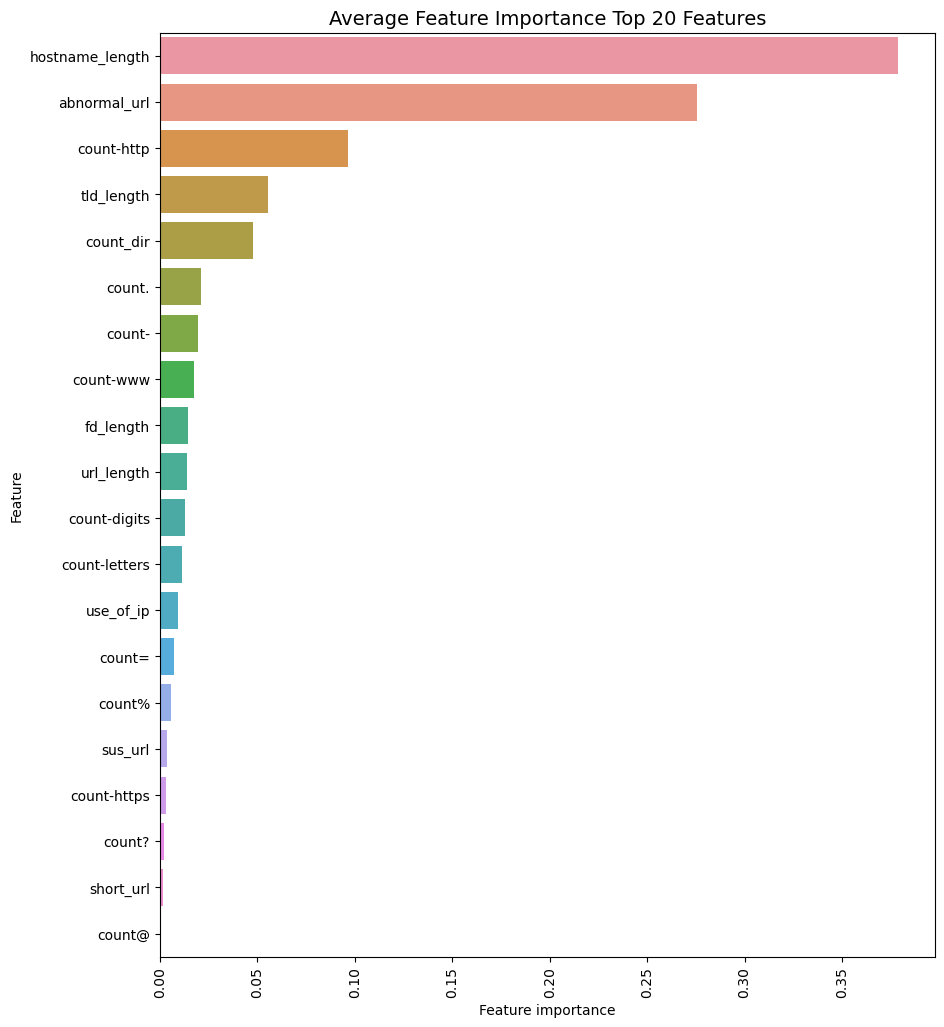

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
def plot_feature_importance():
    tmp = pd.DataFrame({'Feature': X_test.columns, 'Feature importance': feature_dataframe['mean'].values})
    tmp = tmp.sort_values(by='Feature importance',ascending=False).head(20)
    plt.figure(figsize = (10,12))
    plt.title('Average Feature Importance Top 20 Features',fontsize=14)
    s = sns.barplot(y='Feature',x='Feature importance',data=tmp, orient='h')
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()
plot_feature_importance()

# hyper parameter tuning

## extra trees classifier

In [72]:
import optuna

def objective(trial):

    # Number of trees in extra trees
    
    n_estimators = trial.suggest_int(name="n_estimators", low=100, high=500, step=100)

    # Number of features to consider at every split
    max_features = trial.suggest_categorical(name="max_features", choices=['auto', 'sqrt'])

    # Maximum number of levels in tree
    max_depth = trial.suggest_int(name="max_depth", low=10, high=110, step=20)

    # Minimum number of samples required to split a node
    min_samples_split = trial.suggest_int(name="min_samples_split", low=2, high=10, step=2)

    # Minimum number of samples required at each leaf node
    min_samples_leaf = trial.suggest_int(name="min_samples_leaf", low=1, high=4, step=1)

    
    # Random state
    random_state = trial.suggest_int(name="random_state", low=0, high=100, step=1)
    
    params = {
        "n_estimators": n_estimators,
        "max_features": max_features,
        "max_depth": max_depth,
        "min_samples_split": min_samples_split,
        "min_samples_leaf": min_samples_leaf,
        "random_state": random_state
    }
    
    model_et = ExtraTreesClassifier(**params)
    model_et.fit(X_train_res, y_train_res)
    predictions_et = model_et.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, predictions_et)
    return accuracy

study_et = optuna.create_study(direction='maximize')
study_et.optimize(objective, n_trials=30)

[I 2024-07-10 17:18:11,634] A new study created in memory with name: no-name-e4965197-f76b-4f60-9a1d-5845e644fa3d
C:\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[I 2024-07-10 17:20:39,814] Trial 0 finished with value: 0.7111125278251491 and parameters: {'n_estimators': 400, 'max_features': 'auto', 'max_depth': 110, 'min_samples_split': 10, 'min_samples_leaf': 2, 'random_state': 36}. Best is trial 0 with value: 0.7111125278251491.
C:\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default va

In [73]:
print('Extra Trees Best hyperparameters:', study_et.best_params)
print('Extra Trees Best Accuracy:', study_et.best_value)

Extra Trees Best hyperparameters: {'n_estimators': 400, 'max_features': 'sqrt', 'max_depth': 30, 'min_samples_split': 8, 'min_samples_leaf': 2, 'random_state': 19}
Extra Trees Best Accuracy: 0.7143851372530269


In [74]:
# Initialize and start the timer for model training
start_time = time.time()

best_model_et = ExtraTreesClassifier(**study_et.best_params)
best_model_et.fit(X_train_res, y_train_res)

# Calculate the model training time
training_time_et_optuna = time.time() - start_time

train_et = best_model_et.predict(X_train_res)

# Initialize and start the timer for model execution
start_time = time.time()

test_et = best_model_et.predict(X_test)

# Calculate the model execution time
execution_time_et_optuna = ( time.time() - start_time ) / 188229

In [75]:
et_feature_optuna = best_model_et.feature_importances_
et_features_optuna = et_feature_optuna.tolist()

## random forest

In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def objective(trial_rf):
    # Number of trees in random forest
    
    n_estimators = trial_rf.suggest_int(name="n_estimators", low=100, high=500, step=100)

    # Number of features to consider at every split
    max_features = trial_rf.suggest_categorical(name="max_features", choices=['auto', 'sqrt'])

    # Maximum number of levels in tree
    max_depth = trial_rf.suggest_int(name="max_depth", low=10, high=110, step=20)

    # Minimum number of samples required to split a node
    min_samples_split = trial_rf.suggest_int(name="min_samples_split", low=2, high=10, step=2)

    # Minimum number of samples required at each leaf node
    min_samples_leaf = trial_rf.suggest_int(name="min_samples_leaf", low=1, high=4, step=1)
    
    # Random state
    random_state = trial_rf.suggest_int(name="random_state", low=0, high=100, step=1)
    
    params_rf = {
        "n_estimators": n_estimators,
        "max_features": max_features,
        "max_depth": max_depth,
        "min_samples_split": min_samples_split,
        "min_samples_leaf": min_samples_leaf,
        "random_state": random_state
    }
    
    model_rf = RandomForestClassifier(**params_rf)
    model_rf.fit(X_train_res, y_train_res)
    predictions_rf = model_rf.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, predictions_rf)
    return accuracy

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective, n_trials=30)

print('Random Forest Best hyperparameters:', study_rf.best_params)
print('Random Forest Best Accuracy:', study_rf.best_value)

[I 2024-07-10 18:15:16,364] A new study created in memory with name: no-name-13bba314-18b4-4464-8209-043b5fdf9dc0
[I 2024-07-10 18:18:02,410] Trial 0 finished with value: 0.7225029086910093 and parameters: {'n_estimators': 400, 'max_features': 'sqrt', 'max_depth': 90, 'min_samples_split': 4, 'min_samples_leaf': 2, 'random_state': 84}. Best is trial 0 with value: 0.7225029086910093.
C:\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[I 2024-07-10 18:21:25,756] Trial 1 finished with value: 0.7255205095920395 and parameters: {'n_estimators': 500, 'max_features': 'auto', 'max_depth': 30, 'min_samples_split': 8, 'min_samples_leaf': 3, 'random_state': 41}. Best is trial 1 with value: 0.7255205095920395.
C:\a

In [ ]:
# Initialize and start the timer for model training
start_time = time.time()

best_model_rf = RandomForestClassifier(**study_rf.best_params)
best_model_rf.fit(X_train_res, y_train_res)

# Calculate the model training time
training_time_rf_optuna = time.time() - start_time

train_rf = best_model_rf.predict(X_train_res)

# Initialize and start the timer for model execution
start_time = time.time()

test_rf = best_model_rf.predict(X_test)

# Calculate the model execution time
execution_time_rf_optuna = ( time.time() - start_time ) / 188229

In [ ]:
rf_feature_optuna = best_model_rf.feature_importances_
rf_features_optuna = rf_feature_optuna.tolist()

In [ ]:
CM_RF_optuna=confusion_matrix(y_test,test_rf,labels=[0,1])

plot_confusion_matrix(CM_RF_optuna,classes=['good', 'bad'])

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
sample_weight = (test_rf != y_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_predict, sample_weight=sample_weight, normalize="true", values_format=".0%")
plt.title('Random Forest Classifier Error Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
# Save the plot as a PDF
plt.savefig('Random Forest Classifier After Optuna Error Matrix.pdf', format='pdf')
plt.show()

## ada boost

In [ ]:
def objective(trial_ada):
    # Number of trees in random forest
    
    n_estimators = trial_ada.suggest_int(name="n_estimators", low=100, high=500, step=100)
    
    # Random state
    random_state = trial_ada.suggest_int(name="random_state", low=0, high=100, step=1)
    
    params_ada = {
        "n_estimators": n_estimators,
        "random_state": random_state
    }
    
    model_ada = AdaBoostClassifier(**params_ada)
    model_ada.fit(X_train_res, y_train_res)
    predictions_ada = model_ada.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, predictions_ada)
    return accuracy

study_ada = optuna.create_study(direction='maximize')
study_ada.optimize(objective, n_trials=30)

print('Ada Boost Best hyperparameters:', study_ada.best_params)
print('Ada Boost Forest Best Accuracy:', study_ada.best_value)

In [ ]:
# Initialize and start the timer for model training
start_time = time.time()

best_model_ada = AdaBoostClassifier(**study_ada.best_params)
best_model_ada.fit(X_train_res, y_train_res)

# Calculate the model training time
training_time_ada_optuna = time.time() - start_time

train_ada = best_model_ada.predict(X_train_res)

# Initialize and start the timer for model execution
start_time = time.time()

test_ada = best_model_ada.predict(X_test)

# Calculate the model execution time
execution_time_ada_optuna = ( time.time() - start_time ) / 188229

In [ ]:
ada_feature_optuna = best_model_ada.feature_importances_
ada_features_optuna = ada_feature_optuna.tolist()

## SGD Classifier

In [ ]:
def objective(trial_sgd):

    # Random state
    random_state = trial_sgd.suggest_int(name="random_state", low=0, high=100, step=1)
    alpha = trial_sgd.suggest_float("alpha", 1e-5, 1e-1, log=True)
    
    params_sgd = {
        "random_state": random_state,
        "alpha": alpha
    }
    
    model_sgd = SGDClassifier(**params_sgd)
    model_sgd.fit(X_train_res, y_train_res)
    predictions_sgd = model_sgd.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, predictions_sgd)
    return accuracy

study_sgd = optuna.create_study(direction='maximize')
study_sgd.optimize(objective, n_trials=30)

print('SGD Classifier Best hyperparameters:', study_sgd.best_params)
print('SGD Classifier Best Accuracy:', study_sgd.best_value)

In [ ]:
# Initialize and start the timer for model training
start_time = time.time()

best_model_sgd = SGDClassifier(**study_sgd.best_params)
best_model_sgd.fit(X_train_res, y_train_res)

# Calculate the model training time
training_time_sgd_optuna = time.time() - start_time

train_sgd = best_model_sgd.predict(X_train_res)

# Initialize and start the timer for model execution
start_time = time.time()

test_sgd = best_model_sgd.predict(X_test)

# Calculate the model execution time
execution_time_sgd_optuna = ( time.time() - start_time ) / 188229

In [ ]:
CM_SGD_optuna=confusion_matrix(y_test,test_sgd,labels=[0,1])

plot_confusion_matrix(CM_SGD_optuna,classes=['good', 'bad'])

# Save the plot as a PDF
plt.savefig('SGD Classifier After Optuna Confusion Matrix.pdf', format='pdf')

In [ ]:
# Only a sample code to show the logic. It needs to work on the entire dataset to generate sufficient training samples for biased classifiers
def Anomaly_MUDS(X_train, X_test, y_train, y_test,n,b=100):
    # SGD Classifier
    result = best_model_sgd.predict(X_train_res)
    result2 = best_model_sgd.predict(X_test)

    count=0
    a=np.zeros(n)
    b=np.zeros(n)
    for v in range(0,n):
        for i in range(0,len(y_train_res)):
            if result[i]==v:
                if y_train_res[i]==1:
                    a[v]=a[v]+1
                else:
                    b[v]=b[v]+1
    list1=[]
    list2=[]
    for v in range(0,n):
        if a[v]<=b[v]:
            list1.append(v)
        else: 
            list2.append(v)
    for v in range(0,len(y_test)):
        if result2[v] in list1:
            result2[v]=0
        elif result2[v] in list2:
            result2[v]=1
        else:
            print("-1")
    print(classification_report(y_test, result2))
    cm=confusion_matrix(y_test,result2)
    print(cm)
    result2 = np.array(result2)
    y_test = np.array(y_test)
   #acc=metrics.accuracy_score(y_test,result2)
   #print(str(acc))
    
    #Biased classifier construction
    count=0
    a=np.zeros(n)
    b=np.zeros(n)
    FNL=[]
    FPL=[]
    for v in range(0,n):
        al=[]
        bl=[]
        for i in range(0,len(y_train_res)):   
            if result[i]==v:        
                if y_train_res[i]==1:        #label 1
                    a[v]=a[v]+1
                    al.append(i)
                else:             #label 0
                    b[v]=b[v]+1
                    bl.append(i)
        if a[v]<=b[v]:
            FNL.extend(al)
        else:
            FPL.extend(bl)
        #print(str(v)+"="+str(a[v]/(a[v]+b[v])))
        
    dffp=X_train_res.iloc[FPL, :]
    dffn=X_train_res.iloc[FNL, :]
    dfva0=X_train_res[y_train_res==0]
    dfva1=X_train_res[y_train_res==1]
    
    dffpp=dfva1.sample(n=None, frac=len(FPL)/dfva1.shape[0], replace=False, weights=None, random_state=None, axis=0)
    dffnp=dfva0.sample(n=None, frac=len(FNL)/dfva0.shape[0], replace=False, weights=None, random_state=None, axis=0)
    
    dffp_f=pd.concat([dffp, dffpp])
    dffn_f=pd.concat([dffn, dffnp])
    
    Xp = dffp_f  
    yp = dffp_f.iloc[:, -1].values.reshape(-1,1)
    yp=np.ravel(yp)

    Xn = dffn_f  
    yn = dffn_f.iloc[:, -1].values.reshape(-1,1)
    yn=np.ravel(yn)
    
    rfp = RandomForestClassifier(random_state = 0)
    rfp.fit(Xp,yp)
    rfn = RandomForestClassifier(random_state = 0)
    rfn.fit(Xn,yn)

    dffnn_f=pd.concat([dffn, dffnp])
    
    Xnn = dffn_f  
    ynn = dffn_f.iloc[:, -1].values.reshape(-1,1)
    ynn=np.ravel(ynn)

    rfnn = RandomForestClassifier(random_state = 0)
    rfnn.fit(Xnn,ynn)

    X2p = X_test 
    y2p = y_test
    y2p=np.ravel(y2p)

    result2 = best_model_sgd.predict(X2p)

    count=0
    a=np.zeros(n)
    b=np.zeros(n)
    for v in range(0,n):
        for i in range(0,len(y_train_res)):
            if result[i]==v:
                if y_train_res[i]==1:
                    a[v]=a[v]+1
                else:
                    b[v]=b[v]+1
    list1=[]
    list2=[]
    l1=[]
    l0=[]
    for v in range(0,n):
        if a[v]<=b[v]:
            list1.append(v)
        else: 
            list2.append(v)
    for v in range(0,len(y2p)):
        if result2[v] in list1:
            result2[v]=0
            l0.append(v)
        elif result2[v] in list2:
            result2[v]=1
            l1.append(v)
        else:
            print("-1")
    print(classification_report(y2p, result2))
    cm=confusion_matrix(y2p,result2)
    print(cm)

In [ ]:
Anomaly_MUDS(X_train_res, X_test, y_train_res, y_test,16,b=100)

In [ ]:
print(y_train_res.name)

## LGBM

In [ ]:
def objective(trial_lgbm):
    # Number of trees in lgbm
    
    n_estimators = trial_lgbm.suggest_int(name="n_estimators", low=100, high=500, step=100)

    # Number of features to consider at every split
    max_features = trial_lgbm.suggest_categorical(name="max_features", choices=['auto', 'sqrt'])

    # Maximum number of levels in tree
    max_depth = trial_lgbm.suggest_int(name="max_depth", low=10, high=110, step=20)

    # Minimum number of samples required to split a node
    min_samples_split = trial_lgbm.suggest_int(name="min_samples_split", low=2, high=10, step=2)

    # Minimum number of samples required at each leaf node
    min_samples_leaf = trial_lgbm.suggest_int(name="min_samples_leaf", low=1, high=4, step=1)
    
    # Random state
    random_state = trial_lgbm.suggest_int(name="random_state", low=0, high=100, step=1)
    
    params_lgbm = {
        "n_estimators": n_estimators,
        "max_features": max_features,
        "max_depth": max_depth,
        "min_samples_split": min_samples_split,
        "min_samples_leaf": min_samples_leaf,
        "random_state": random_state
    }
    
    model_lgbm = LGBMClassifier(**params_lgbm)
    model_lgbm.fit(X_train_res, y_train_res)
    predictions_lgbm = model_lgbm.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, predictions_lgbm)
    return accuracy

study_lgbm = optuna.create_study(direction='maximize')
study_lgbm.optimize(objective, n_trials=30)

print('LGBM Classifier Best hyperparameters:', study_lgbm.best_params)
print('LGBM Classifier Best Accuracy:', study_lgbm.best_value)

In [ ]:
# Initialize and start the timer for model training
start_time = time.time()

best_model_lgbm = LGBMClassifier(**study_lgbm.best_params)
best_model_lgbm.fit(X_train_res, y_train_res)

# Calculate the model training time
training_time_lgbm_optuna = time.time() - start_time

train_lgbm = best_model_lgbm.predict(X_train_res)

# Initialize and start the timer for model execution
start_time = time.time()

test_lgbm = best_model_lgbm.predict(X_test)

# Calculate the model execution time
execution_time_lgbm_optuna = ( time.time() - start_time ) / 188229

In [ ]:
lgbm_feature_optuna = best_model_lgbm.feature_importances_
lgbm_features_optuna = lgbm_feature_optuna.tolist()

## XGB

In [ ]:
def objective(trial_xgb):
    # Number of trees in lgbm
    
    n_estimators = trial_xgb.suggest_int(name="n_estimators", low=100, high=500, step=100)

    # Number of features to consider at every split
    max_features = trial_xgb.suggest_categorical(name="max_features", choices=['auto', 'sqrt'])

    # Maximum number of levels in tree
    max_depth = trial_xgb.suggest_int(name="max_depth", low=10, high=110, step=20)

    # Minimum number of samples required to split a node
    min_samples_split = trial_xgb.suggest_int(name="min_samples_split", low=2, high=10, step=2)

    # Minimum number of samples required at each leaf node
    min_samples_leaf = trial_xgb.suggest_int(name="min_samples_leaf", low=1, high=4, step=1)
    
    # Random state
    random_state = trial_xgb.suggest_int(name="random_state", low=0, high=100, step=1)
    
    params_xgb = {
        "n_estimators": n_estimators,
        "max_features": max_features,
        "max_depth": max_depth,
        "min_samples_split": min_samples_split,
        "min_samples_leaf": min_samples_leaf,
        "random_state": random_state
    }
    
    model_xgb = xgb. XGBClassifier(**params_xgb)
    model_xgb.fit(X_train_res, y_train_res)
    predictions_xgb = model_xgb.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, predictions_xgb)
    return accuracy

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=30)

print('XGB Classifier Best hyperparameters:', study_xgb.best_params)
print('XGB Classifier Best Accuracy:', study_xgb.best_value)

In [ ]:
# Initialize and start the timer for model training
start_time = time.time()

best_model_xgb = XGBClassifier(**study_xgb.best_params)
best_model_xgb.fit(X_train_res, y_train_res)

# Calculate the model training time
training_time_xgb_optuna = time.time() - start_time

train_xgb = best_model_xgb.predict(X_train_res)

# Initialize and start the timer for model training
start_time = time.time()

test_xgb = best_model_xgb.predict(X_test)

# Calculate the model execution time
execution_time_xgb_optuna = ( time.time() - start_time ) / 188229

In [ ]:
xgb_feature_optuna = best_model_xgb.feature_importances_
xgb_features_optuna = xgb_feature_optuna.tolist()

## Gradient Boosting Classifier

In [ ]:
def objective(trial_gbc):
    
    # Random state
    random_state = trial_gbc.suggest_int(name="random_state", low=0, high=100, step=1)
    
    params_gbc = {
        "random_state": random_state
    }
    
    model_gbc = GradientBoostingClassifier(**params_gbc)
    model_gbc.fit(X_train_res, y_train_res)
    predictions_gbc = model_gbc.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, predictions_gbc)
    return accuracy

study_gbc = optuna.create_study(direction='maximize')
study_gbc.optimize(objective, n_trials=30)

print('Gradient Boosting Classifier Best hyperparameters:', study_gbc.best_params)
print('Gradient Boosting Classifier Best Accuracy:', study_gbc.best_value)

In [ ]:
# Initialize and start the timer for model training
start_time = time.time()

best_model_gbc = GradientBoostingClassifier(**study_gbc.best_params)
best_model_gbc.fit(X_train_res, y_train_res)

# Calculate the model training time
training_time_gbc_optuna = time.time() - start_time

train_gbc = best_model_gbc.predict(X_train_res)

# Initialize and start the timer for model training
start_time = time.time()

test_gbc = best_model_gbc.predict(X_test)

# Calculate the model execution time
execution_time_gbc_optuna = ( time.time() - start_time ) / 188229

In [ ]:
gbc_feature_optuna = best_model_gbc.feature_importances_
gbc_features_optuna = gbc_feature_optuna.tolist()

## Stacking

In [ ]:
base_predictions_train_optuna = pd.DataFrame( {
    'LGBM Classifier': train_lgbm.ravel(),
        'Random Forest Classifier': train_rf.ravel(),
     'XGB Classifier': train_xgb.ravel(),
     'Gradient Boosting Classifier': train_gbc.ravel(),
    })
base_predictions_train_optuna.head(5)

In [ ]:
train_lgbm=train_lgbm.reshape(-1, 1)
train_rf=train_rf.reshape(-1, 1)
train_xgb=train_xgb.reshape(-1, 1)
train_gbc=train_gbc.reshape(-1, 1)
test_lgbm=test_lgbm.reshape(-1, 1)
test_rf=test_rf.reshape(-1, 1)
test_xgb=test_xgb.reshape(-1, 1)
test_gbc=test_gbc.reshape(-1, 1)

In [ ]:
train_x = np.concatenate(( train_lgbm, train_rf, train_xgb, train_gbc), axis=1)
test_x = np.concatenate(( test_lgbm, test_rf, test_xgb, test_gbc), axis=1)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns

# Initialize and start the timer for model training
start_time = time.time()

stk_optuna = xgb.XGBClassifier().fit(train_x, y_train_res)

# Calculate the model training time
training_time_stk_optuna = time.time() - start_time

# Initialize and start the timer for model execution
start_time = time.time()

predict_y=stk_optuna.predict(test_x)

# Calculate the model execution time
execution_time_stk_optuna = ( time.time() - start_time ) / 188229

y_true=y_test
stk_score=accuracy_score(y_true,predict_y)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, predict_y, average='weighted') 
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,predict_y))

In [ ]:
stk_feature_optuna = stk_optuna.feature_importances_
stk_features_optuna = stk_feature_optuna.tolist()

## Performance Metrics

In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

# Assuming you have imported the classifiers and defined their predictions
classifiers_optuna = [test_ada, test_sgd, test_et, test_lgbm, test_rf, test_xgb, test_gbc, predict_y]
model_names = ['Ada Boost', 'SGD', 'Extra Trees', 'LGBM', 'Random Forest', 'XGB', 'Gradient Boosting', 'Stacking']

# Create a dictionary to map model names to their respective predictions
classifier_map_optuna = dict(zip(model_names, classifiers_optuna))

# Now you can use this dictionary to iterate over each model name and its predictions
for model_name, y_pred in classifier_map_optuna.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1score = f1_score(y_test, y_pred, average='weighted')
    class_report = classification_report(y_test, y_pred)

    print(f"\nMetrics for Model '{model_name}':")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1score}")
    print(f"Classification Report:\n{class_report}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Initialize data for the bar chart
models = list(classifier_map_optuna.keys()) + ['CL_K-means']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Calculate metric scores for each model
metric_scores = {}
for metric in metrics:
    metric_scores[metric] = [
        accuracy_score(y_test, classifier_map_optuna[model_name]) 
        if metric == 'Accuracy'
        else precision_score(y_test, classifier_map_optuna[model_name], average='weighted')
        if metric == 'Precision'
        else recall_score(y_test, classifier_map_optuna[model_name], average='weighted')
        if metric == 'Recall'
        else f1_score(y_test, classifier_map_optuna[model_name], average='weighted')
        for model_name in models[:-1]
    ]

    if metric == 'Accuracy':
        metric_scores[metric].append(0.9077)
    elif metric == 'Precision':
        metric_scores[metric].append(0.9203)
    elif metric == 'Recall':
        metric_scores[metric].append(0.8927)
    elif metric == 'F1-score':
        metric_scores[metric].append(0.9063)

# Set width of bars
bar_width = 0.16

# Set position of bars on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.figure(figsize=(12, 6))

# Define light colors
colors = ['#48C9B0', '#FFA500', '#FF6347', '#7B68EE']

# Plotting the bars
bars = []
bars.append(plt.bar(r1, metric_scores['Accuracy'], color=colors[0], width=bar_width, edgecolor='grey', label='Accuracy'))
bars.append(plt.bar(r2, metric_scores['Precision'], color=colors[1], width=bar_width, edgecolor='grey', label='Precision'))
bars.append(plt.bar(r3, metric_scores['Recall'], color=colors[2], width=bar_width, edgecolor='grey', label='Recall'))
bars.append(plt.bar(r4, metric_scores['F1-score'], color=colors[3], width=bar_width, edgecolor='grey', label='F1-score'))

# Adding labels on top of each bar with percentage format
for i, container in enumerate(bars):
   for j, bar in enumerate(container):
       yval = bar.get_height()
       if yval == max(metric_scores[metrics[i]]):
           plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.005, f'{yval*100:.2f}%', va='bottom', ha='center', rotation=90, fontsize=8, weight='bold')
       else:
           plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.005, f'{yval*100:.2f}%', va='bottom', ha='center', rotation=90, fontsize=8)

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width*1.5 for r in range(len(models))], models)

# Set y-axis as percentage and its limits
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))
plt.ylim(0.3, 1.3)  # Keep the original scale but now interpreted as percentages

# Add a legend and show the plot
plt.legend()
# Save the plot as a PDF
plt.savefig('Model Performance Comparison after HPO.pdf', format='pdf')
plt.show()

# Training Time Comparision - Optuna

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have imported the classifiers and defined their training times
training_times_optuna = [training_time_ada_optuna, training_time_sgd_optuna, training_time_et_optuna, training_time_lgbm_optuna, training_time_rf_optuna, training_time_xgb_optuna, training_time_gbc_optuna, training_time_stk_optuna]

# Initialize data for the line plot
training_models_optuna = ['AdaBoost', 'SGD', 'ExtraTrees', 'LGBM', 'RandomForest', 'XGBoost', 'GrandientBoosting', 'Stacking']  # Assuming these are your model names

# Set figure size
plt.figure(figsize=(10, 6))

# Define line colors and styles
colors = ['#48C9B0', '#FFA500', '#FF6347', '#7B68EE', '#8A2BE2']
linestyles = ['-', '--', ':', '-.', '-']

plt.plot(training_models_optuna, training_times_optuna, color=colors[0], linestyle=linestyles[i], linewidth=2, marker='o', markersize=8, label='Training Time')

# Add grid and axis labels
plt.grid(True)
plt.xlabel('Model', fontweight='bold', fontsize=12)
plt.ylabel('Training Time (seconds)', fontweight='bold', fontsize=12)

# Set x-axis tick labels
plt.xticks(x, training_models_optuna, rotation=45, ha='right', fontsize=10)

# Add a legend
plt.legend(loc='upper left', fontsize=10)

# Adjust the layout
plt.tight_layout()

# Save the plot as a PDF
plt.savefig('Model Training Time Comparison After Optuna.pdf', format='pdf')
plt.show()

# Training Time Comparision - Two

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have imported the classifiers and defined their training times
training_times = [training_time_ada, training_time_sgd, training_time_et, training_time_lgbm, training_time_rf, training_time_xgb, training_time_gbc, training_time_stk]
training_times_optuna = [training_time_ada_optuna, training_time_sgd_optuna, training_time_et_optuna, training_time_lgbm_optuna, training_time_rf_optuna, training_time_xgb_optuna, training_time_gbc_optuna, training_time_stk_optuna]

# Transpose the training_times lists to make them 2D arrays
training_times = np.array(training_times).T
training_times_optuna = np.array(training_times_optuna).T

# Initialize data for the line plot
training_models = ['AdaBoost', 'SGD', 'ExtraTrees', 'LGBM', 'RandomForest', 'XGBoost', 'GrandientBoosting', 'Stacking']  # Assuming these are your model names

# Set figure size
plt.figure(figsize=(10, 6))

# Define line colors and styles
colors = ['#48C9B0', '#FFA500']
linestyles = ['-', '--']

# Plot the training times before and after Optuna
x = np.arange(len(training_models))
plt.plot(x, training_times, color=colors[0], linestyle=linestyles[0], linewidth=2, marker='o', markersize=8, label='Before Optuna')
plt.plot(x, training_times_optuna, color=colors[1], linestyle=linestyles[1], linewidth=2, marker='o', markersize=8, label='After Optuna')

# Add grid and axis labels
plt.grid(True)
plt.xlabel('Model', fontweight='bold', fontsize=12)
plt.ylabel('Training Time (seconds)', fontweight='bold', fontsize=12)

# Set x-axis tick labels
plt.xticks(x, training_models, rotation=45, ha='right', fontsize=10)

# Add a legend
plt.legend(loc='upper left', fontsize=10)

# Adjust the layout
plt.tight_layout()

# Save the plot as a PDF
plt.savefig('Model Training Time Comparison Before and After Optuna.pdf', format='pdf')
plt.show()

# Execution Time Comparision - Optuna

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

# Assuming you have imported the classifiers and defined their predicting times
execution_times_optuna = [execution_time_ada_optuna * 1_000_000,
                   execution_time_sgd_optuna * 1_000_000,
                   execution_time_et_optuna * 1_000_000,
                   execution_time_lgbm_optuna * 1_000_000,
                   execution_time_rf_optuna * 1_000_000,
                   execution_time_xgb_optuna * 1_000_000,
                   execution_time_gbc_optuna * 1_000_000,
                   execution_time_stk_optuna * 1_000_000]
model_names = ['AdaBoostClassifier', 'SGD Classifier', 'ExtraTrees Classifier', 'LGBM', 'RandomForestClassifier', 'XGBClassifier', 'GradientBoostingClassifier', 'Stacking']

execution_time = ['Execution Time']

# Initialize data for the line plot
x = np.arange(len(model_names))

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Define the line properties
line_width = 2
marker_size = 8
marker_style = 'o'

# Plot the line graph
ax.plot(x, execution_times_optuna, linewidth=line_width, marker=marker_style, markersize=marker_size, color='#1f77b4')

# Add axis labels and title
ax.set_xlabel('Model', fontweight='bold', fontsize=12)
ax.set_ylabel('Execution Time (microseconds)', fontweight='bold', fontsize=12)
ax.set_title('Comparison of Model Execution Times After Optuna', fontweight='bold', fontsize=14)

# Customize the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right', fontsize=10)

# Add grid lines
ax.grid(True, linestyle='--', linewidth=1, color='#BBBBBB')

# Adjust the spacing between subplots
plt.subplots_adjust(bottom=0.2)

# Add a legend
legend_font = font_manager.FontProperties(size=10)
ax.legend(model_names, loc='upper left', prop=legend_font)

# Save the plot as a PDF
plt.savefig('Model Execution Time Comparison After Optuna.pdf', format='pdf')
plt.show()

# Execution Time Comparision

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

# Assuming you have imported the classifiers and defined their predicting times
execution_times = [execution_time_ada * 1_000_000,
                   execution_time_sgd * 1_000_000,
                   execution_time_et * 1_000_000,
                   execution_time_lgbm * 1_000_000,
                   execution_time_rf * 1_000_000,
                   execution_time_xgb * 1_000_000,
                   execution_time_gbc * 1_000_000,
                   execution_time_stk * 1_000_000]

execution_times_optuna = [execution_time_ada_optuna * 1_000_000,
                         execution_time_sgd_optuna * 1_000_000,
                         execution_time_et_optuna * 1_000_000,
                         execution_time_lgbm_optuna * 1_000_000,
                         execution_time_rf_optuna * 1_000_000,
                         execution_time_xgb_optuna * 1_000_000,
                         execution_time_gbc_optuna * 1_000_000,
                         execution_time_stk_optuna * 1_000_000]

model_names = ['AdaBoostClassifier', 'SGD Classifier', 'ExtraTrees Classifier', 'LGBM', 'RandomForestClassifier', 'XGBClassifier', 'GradientBoostingClassifier', 'Stacking']

# Initialize data for the line plots
x = np.arange(len(model_names))

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Define the line properties
line_width = 2
marker_size = 8
marker_style = 'o'

# Plot the line graphs
ax.plot(x, execution_times, linewidth=line_width, marker=marker_style, markersize=marker_size, color='#1f77b4', label='Before Optuna')
ax.plot(x, execution_times_optuna, linewidth=line_width, marker=marker_style, markersize=marker_size, color='#ff7f0e', label='After Optuna')

# Add axis labels and title
ax.set_xlabel('Model', fontweight='bold', fontsize=12)
ax.set_ylabel('Execution Time (microseconds)', fontweight='bold', fontsize=12)
ax.set_title('Comparison of Model Execution Times Before and After Optuna', fontweight='bold', fontsize=14)

# Customize the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right', fontsize=10)

# Add grid lines
ax.grid(True, linestyle='--', linewidth=1, color='#BBBBBB')

# Adjust the spacing between subplots
plt.subplots_adjust(bottom=0.2)

# Add a legend
legend_font = font_manager.FontProperties(size=10)
ax.legend(loc='upper left', prop=legend_font)

# Save the plot as a PDF
plt.savefig('Model Execution Time Comparison Before and After Optuna.pdf', format='pdf')
plt.show()

In [ ]:
training_times

In [ ]:
training_times_optuna

In [ ]:
execution_times

In [ ]:
execution_times_optuna

# Plotting ensemble Feature Importance

In [ ]:
cols = X_train_res.columns
# Create a dataframe with features
feature_dataframe_optuna = pd.DataFrame( {'features': cols,
    'Random Forest feature importances': rf_features,

    })

# feature_dataframe['LGBM feature importances'] = feature_dataframe['LGBM feature importances'].astype(float)

print(feature_dataframe_optuna.dtypes)

import numpy as np

feature_dataframe_optuna['mean'] = feature_dataframe_optuna.select_dtypes(include='number').mean(axis=1) # axis = 1 computes the mean row-wise

# feature_dataframe['mean'] = feature_dataframe.mean(axis= 1) # axis = 1 computes the mean row-wise

feature_dataframe_optuna.head(4)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
def plot_feature_importance_optuna():
    tmp_optuna = pd.DataFrame({'Feature': X_test.columns, 'Feature importance': feature_dataframe_optuna['mean'].values})
    tmp_optuna = tmp_optuna.sort_values(by='Feature importance',ascending=False).head(20)
    plt.figure(figsize = (10,12))
    plt.title('Average Feature Importance Top 20 Features',fontsize=14)
    s = sns.barplot(y='Feature',x='Feature importance',data=tmp_optuna, orient='h')
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()
    plt.savefig('Average Feature Importance Top 20 Features After Optuna.pdf', format='pdf')
plot_feature_importance()